# Regression with CART Trees - Lab

## Introduction

In this lab, we shall put into practice, the skills shown in the previous code along. We shall use a simple dataset from Kaggle, called the ["Petrol Consumption Dataset"](https://www.kaggle.com/harinir/petrol-consumption) which entails the petrol consumption for a bunch of examples, based on drivers' features.

## Objectives
You will be able to:
- Conduct a regression experiment using CART trees
- Evaluate the model fit and study the impact of hyper parameters on the final tree
- Understand training, prediction, evaluation and visualizations required to run regression experiments using trees

## Import necessary libraries 

In [2]:
# Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


## Read the dataset `petrol_consumption.csv` and view its head and dimensions

In [3]:
# Read the dataset and view head and dimensions

df = pd.read_csv('petrol_consumption.csv')
print(df.shape)
df.head()
# Code here

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Check the basic statistics for the dataset and inspect the target variable `Petrol_Consumption`

In [4]:
# Describe the dataset

df.describe()

# Code here

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create features, labels and train/test datasets with a 80/20 split

As with the classification task, we will divide our data into attributes/features and labels and consequently into training and test sets.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Create datasets for training and test
features = df.drop(['Petrol_Consumption'], axis = 1)
target = df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state = 0)

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
# Train a regression tree model with training data 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

 ## Using test set, make predictions and calculate the MAE, MSE and RMSE
 
To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The `sklearn` library contains functions that can help calculate these values for us. To do so, use this code from the `metrics` package.

In [9]:
from sklearn import metrics

In [10]:
# Predict and evaluate the predictions
y_hat = regressor.predict(X_test)
mean_absolute_error = metrics.mean_absolute_error(y_test, y_hat)
mean_squared_error = metrics.mean_squared_error(y_test, y_hat)
root_mean_squared_error = mean_squared_error ** .5


print('Mean Absolute Error: {}'.format(mean_absolute_error))
print('Mean Squared Error: {}'.format(mean_squared_error))
print('Root Mean Squared Error: {}'.format(root_mean_squared_error))

Mean Absolute Error: 55.7
Mean Squared Error: 5342.9
Root Mean Squared Error: 73.09514347752523


## Visualize the tree using `graphviz`

Let's visualize our learnt tree as we have been doing in previous lessons and labs. 

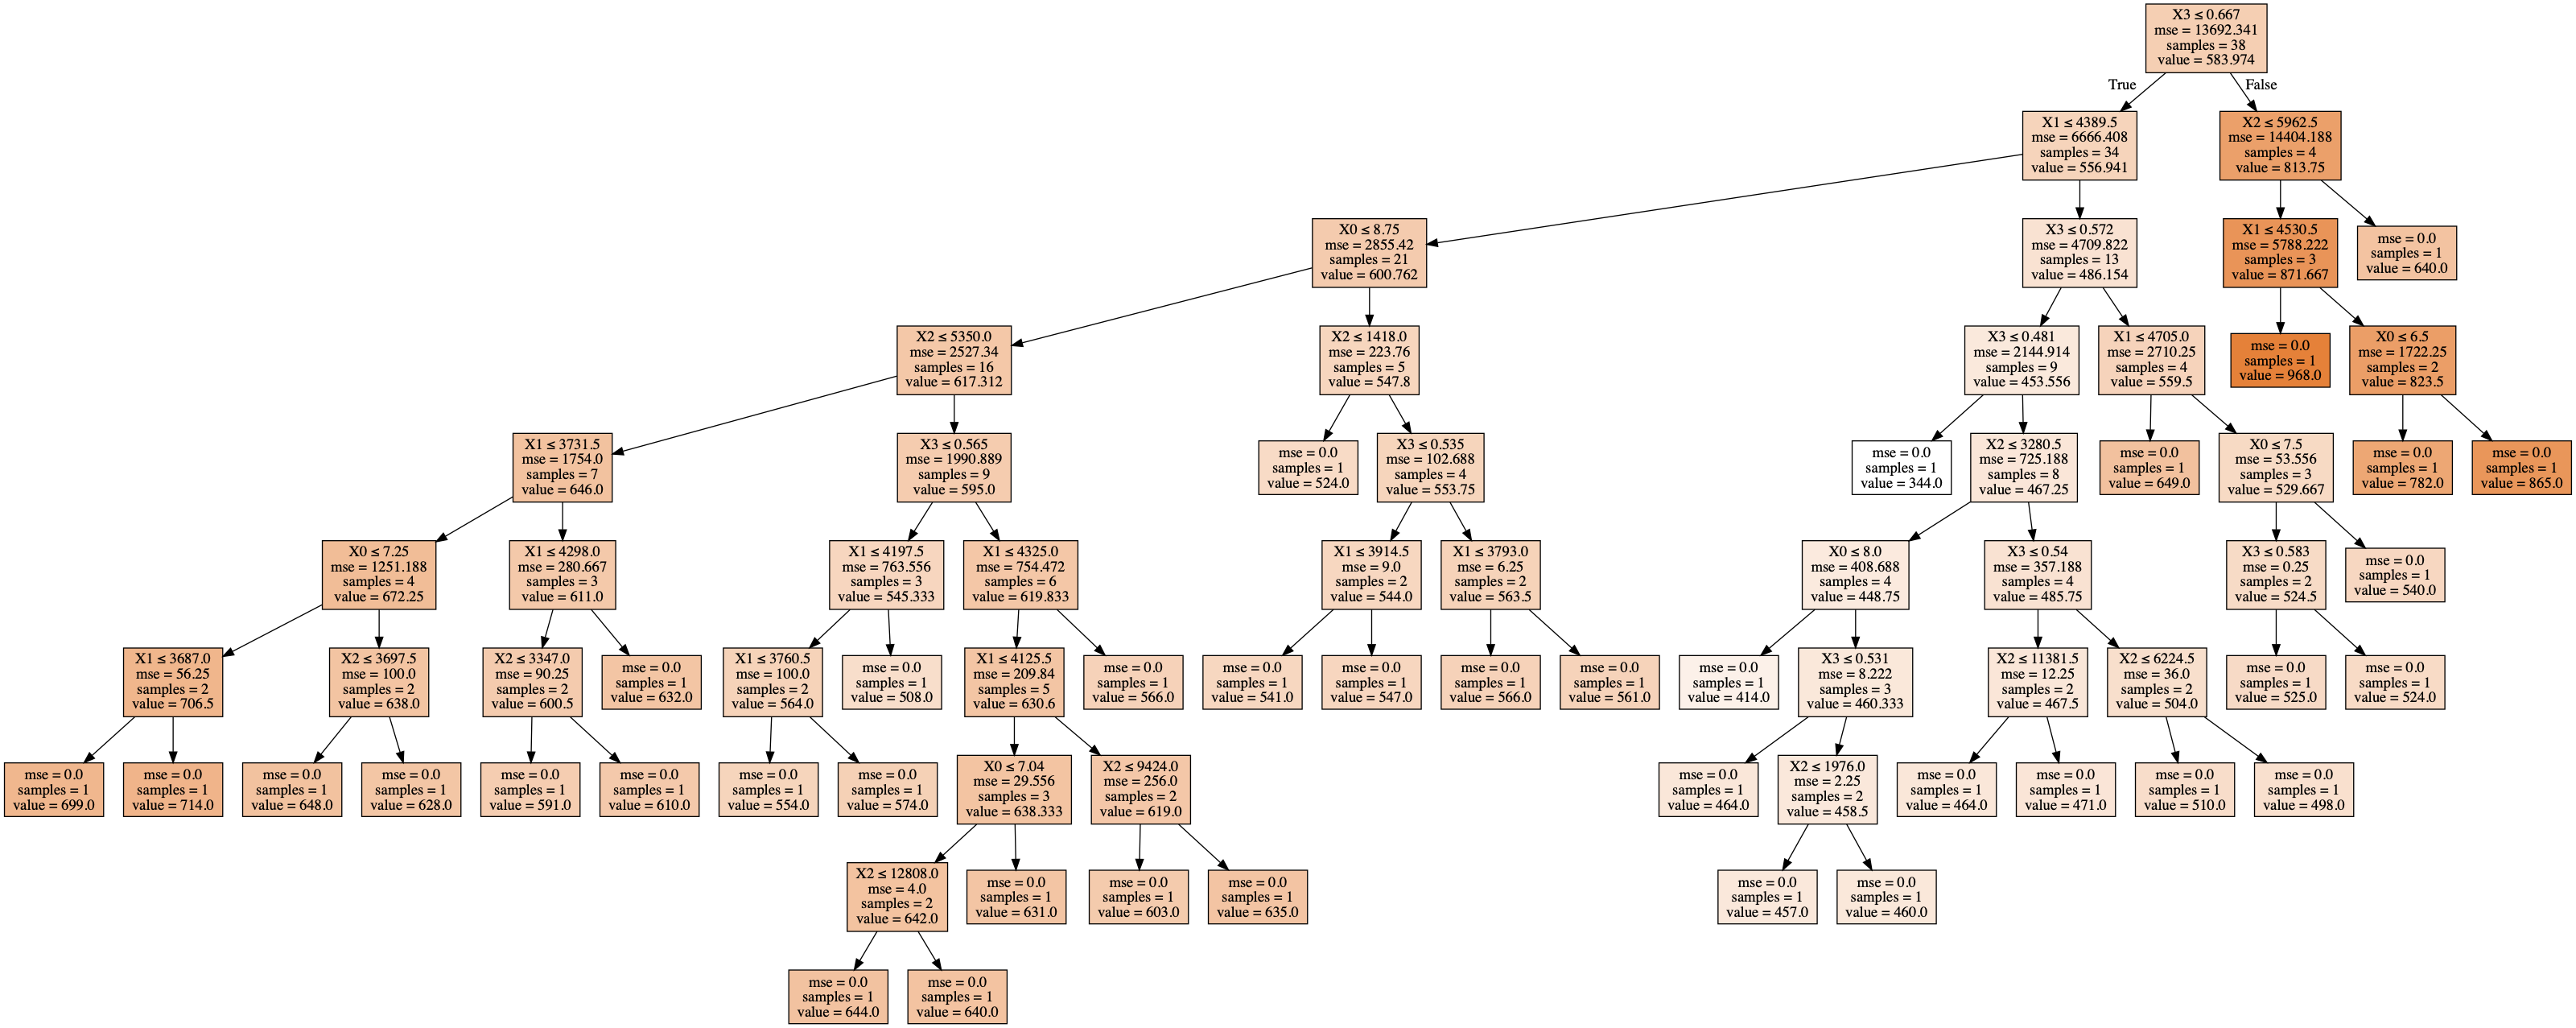

In [11]:
# Visualize the decision tree using graph viz library 
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file = dot_data, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



## Level Up - Optional 

- In order to understand and interpret a tree structure, we need some domain knowledge in which the data was generated. That can help us inspect each leaf and investigate/prune the tree based on qualitative analysis. 

- Look at the hyper parameters used in the regression tree, check their values ranges in official doc and try running some optimization by growing a number of trees in a loop. 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results.

- Check for outliers, try normalization and see the impact on the output 

## Summary 

In this lesson, we developed a tree regressor architecture to train the regressor and predict values for unseen data. We saw that with a vanilla approach, the results were not so great, and this requires further pre-tuning of the model (what we described as hyper parameter optimization OR pruning in the case of trees. 